In [ ]:
# LUCAS: Statistics for Data Science & Machine Learning - Alcides Carlos de Araújo



#  ENTREGA 03 – Avaliação de Dataset (100 PONTOS)



# 1. Carregar no Colab os dados propostos na Entrega 2.

#  2. Realizar algumas das análises propostas no planejamento utilizando o python e o Colab.



# Deverá ser entregue:

# Arquivo .ipynb (NOMEDOGRUPO_challengeMinsaitFase3.ipynb) contendo as análises realizadas.

- GABRIEL DE OLIVEIRA ANTONIETTE - RM99854
- GABRIEL DE SOUZA DENTE - RM550796
- LEANDRO DIAS VIEIRA - RM550997
- LUCAS NAKANISHI BECK DEPIERI - RM552092
- SILVIA LIMA CARNEIRO ARAUJO - RM98833



# Biblioteca

In [ ]:
#Importação das bibliotecas que vão ser utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

# Carregar CSV

- Carregamento do dataset, codifiquei em UTF-8 e alterei o formato dos números que estavam em object para o formato de float

In [ ]:
df_sinistro = pd.read_csv('Relatorio 25-08-2023.csv', encoding = 'utf8', thousands='.', decimal=',')
df_sinistro

,Situacao,evento,Regiao,UF,Municipio,Textbox31,Textbox32,Textbox33,Textbox34,Textbox35,...,Textbox115,Textbox116,Textbox117,Textbox118,Textbox119,Textbox120,Textbox121,Textbox122,Textbox123,Textbox124
0,COM SINISTRO,SECA,SUL,RS,CONSTANTINA,4565.6,443,33460789.11,1997040.73,4560.5,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
1,COM SINISTRO,SECA,SUL,RS,RONDINHA,4351.7,360,29760330.74,1785032.35,4351.7,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
2,COM SINISTRO,SECA,SUL,RS,SANTA ROSA,4234.3,353,28641113.19,1699676.53,4203.8,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
3,COM SINISTRO,SECA,SUL,RS,GUARANI DAS MISSÕES,4165.6,363,27320899.06,1656071.53,4161.1,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
4,COM SINISTRO,SECA,SUL,RS,SANTO ÂNGELO,4248.2,278,26646951.53,1628029.73,4248.2,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,SEM SINISTRO,-,NORTE,TO,LAGOA DO TOCANTINS,20.0,1,122523.65,7782.67,0.0,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
5478,SEM SINISTRO,-,NORTE,TO,ARAGUAÍNA,6.3,1,41192.42,1647.96,0.0,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
5479,SEM SINISTRO,-,NORTE,TO,PAU D'ARCO,1.0,1,33884.16,1017.01,0.0,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9
5480,SEM SINISTRO,-,NORTE,RR,BOA VISTA,40.8,3,345824.14,10763.91,0.0,...,615071.8,47916,3.939178e+09,587366.1,45597,3.747835e+09,2.711371e+09,5021.9,278,28828260.9


In [ ]:
df_sinistro.dtypes

Situacao       object
evento         object
Regiao         object
UF             object
Municipio      object
               ...   
Textbox120    float64
Textbox121    float64
Textbox122    float64
Textbox123      int64
Textbox124    float64
Length: 75, dtype: object

#Ajustes

- Optei por remover algumas colunas que foram destinadas a filtragens diretamente no Banco Central do Brasil, como mês/ano e tipo de seguro. Essas colunas não seriam empregadas nesse tipo específico de análise.

In [ ]:
#Visualização das colunas para identificar quais as colunas que irão ser utilizadas comparando com o insight do Excel
df_sinistro.columns.unique

<bound method Index.unique of Index(['Situacao', 'evento', 'Regiao', 'UF', 'Municipio', 'Textbox31',
       'Textbox32', 'Textbox33', 'Textbox34', 'Textbox35', 'Textbox36',
       'Textbox38', 'Textbox40', 'Textbox41', 'Textbox44', 'Textbox46',
       'Textbox47', 'Textbox48', 'Textbox49', 'Textbox81', 'Textbox82',
       'Textbox83', 'Textbox84', 'Textbox85', 'Textbox86', 'Textbox87',
       'Textbox88', 'Textbox89', 'Textbox90', 'Textbox91', 'Textbox92',
       'Textbox93', 'Textbox94', 'Textbox51', 'Textbox66', 'Textbox67',
       'Textbox68', 'Textbox69', 'Textbox70', 'Textbox71', 'Textbox72',
       'Textbox73', 'Textbox74', 'Textbox75', 'Textbox76', 'Textbox77',
       'Textbox78', 'Textbox26', 'Textbox79', 'Textbox95', 'Textbox96',
       'Textbox97', 'Textbox98', 'Textbox99', 'Textbox100', 'Textbox101',
       'Textbox102', 'Textbox103', 'Textbox104', 'Textbox105', 'Textbox106',
       'Textbox111', 'Textbox112', 'Textbox113', 'Textbox114', 'Textbox115',
       'Textbox116', 'T

In [ ]:
#Restrição das 19 colunas que contém os dados necessários
dados_sinistro = df_sinistro.iloc[:, 0:19]
dados_sinistro

,Situacao,evento,Regiao,UF,Municipio,Textbox31,Textbox32,Textbox33,Textbox34,Textbox35,Textbox36,Textbox38,Textbox40,Textbox41,Textbox44,Textbox46,Textbox47,Textbox48,Textbox49
0,COM SINISTRO,SECA,SUL,RS,CONSTANTINA,4565.6,443,33460789.11,1997040.73,4560.5,440,33425119.52,4523.8,437,33208667.30,27764809.84,0.0,0,0.00
1,COM SINISTRO,SECA,SUL,RS,RONDINHA,4351.7,360,29760330.74,1785032.35,4351.7,360,29760330.74,4317.2,358,29531572.44,24403883.40,0.0,0,0.00
2,COM SINISTRO,SECA,SUL,RS,SANTA ROSA,4234.3,353,28641113.19,1699676.53,4203.8,350,28471832.99,4203.8,350,28471832.99,21513079.02,0.0,0,0.00
3,COM SINISTRO,SECA,SUL,RS,GUARANI DAS MISSÕES,4165.6,363,27320899.06,1656071.53,4161.1,362,27289964.48,4125.1,361,27090445.24,24777491.60,0.0,0,0.00
4,COM SINISTRO,SECA,SUL,RS,SANTO ÂNGELO,4248.2,278,26646951.53,1628029.73,4248.2,278,26646951.53,4234.6,276,26559883.90,24641569.98,7.0,1,56517.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,SEM SINISTRO,-,NORTE,TO,LAGOA DO TOCANTINS,20.0,1,122523.65,7782.67,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5478,SEM SINISTRO,-,NORTE,TO,ARAGUAÍNA,6.3,1,41192.42,1647.96,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5479,SEM SINISTRO,-,NORTE,TO,PAU D'ARCO,1.0,1,33884.16,1017.01,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5480,SEM SINISTRO,-,NORTE,RR,BOA VISTA,40.8,3,345824.14,10763.91,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00


- Renomeei as colunas com o que tinha no insight do Excel

In [ ]:
colunas_renomeadas = {
    'Textbox31':'AdesoesArea',
    'Textbox32':'AdesoesContrato',
    'Textbox33':'AdesoesAmparado',
    'Textbox34':'AdesoesAdicional',
    'Textbox35':'SinComunicadoPerdasArea',
    'Textbox36':'SinComunicadoPerdasContrato',
    'Textbox38':'SinComunicadoPerdasAmparado',
    'Textbox40':'SinCoberturaDeferidoArea',
    'Textbox41':'SinCoberturaDeferidoContrato',
    'Textbox44':'SinCoberturaDeferidoAmparado',
    'Textbox46':'SinCoberturaDeferidoPago',
    'Textbox47':'SinCoberturaAnaliseArea',
    'Textbox48':'SinCoberturaAnaliseContrato',
    'Textbox49':'SinCoberturaAnaliseAmparado',
    }

In [ ]:
dados_sinistro.rename(columns = colunas_renomeadas, inplace = True)
dados_sinistro

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
0,COM SINISTRO,SECA,SUL,RS,CONSTANTINA,4565.6,443,33460789.11,1997040.73,4560.5,440,33425119.52,4523.8,437,33208667.30,27764809.84,0.0,0,0.00
1,COM SINISTRO,SECA,SUL,RS,RONDINHA,4351.7,360,29760330.74,1785032.35,4351.7,360,29760330.74,4317.2,358,29531572.44,24403883.40,0.0,0,0.00
2,COM SINISTRO,SECA,SUL,RS,SANTA ROSA,4234.3,353,28641113.19,1699676.53,4203.8,350,28471832.99,4203.8,350,28471832.99,21513079.02,0.0,0,0.00
3,COM SINISTRO,SECA,SUL,RS,GUARANI DAS MISSÕES,4165.6,363,27320899.06,1656071.53,4161.1,362,27289964.48,4125.1,361,27090445.24,24777491.60,0.0,0,0.00
4,COM SINISTRO,SECA,SUL,RS,SANTO ÂNGELO,4248.2,278,26646951.53,1628029.73,4248.2,278,26646951.53,4234.6,276,26559883.90,24641569.98,7.0,1,56517.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,SEM SINISTRO,-,NORTE,TO,LAGOA DO TOCANTINS,20.0,1,122523.65,7782.67,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5478,SEM SINISTRO,-,NORTE,TO,ARAGUAÍNA,6.3,1,41192.42,1647.96,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5479,SEM SINISTRO,-,NORTE,TO,PAU D'ARCO,1.0,1,33884.16,1017.01,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
5480,SEM SINISTRO,-,NORTE,RR,BOA VISTA,40.8,3,345824.14,10763.91,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00


-  Separação do dataset por 'COM SINISTRO' para poder fazer análises apenas com o Sinistro


In [ ]:
dados_com_sinistro = dados_sinistro[dados_sinistro['Situacao'].isin(['COM SINISTRO'])]
dados_com_sinistro

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
0,COM SINISTRO,SECA,SUL,RS,CONSTANTINA,4565.6,443,33460789.11,1997040.73,4560.5,440,33425119.52,4523.8,437,33208667.30,27764809.84,0.0,0,0.00
1,COM SINISTRO,SECA,SUL,RS,RONDINHA,4351.7,360,29760330.74,1785032.35,4351.7,360,29760330.74,4317.2,358,29531572.44,24403883.40,0.0,0,0.00
2,COM SINISTRO,SECA,SUL,RS,SANTA ROSA,4234.3,353,28641113.19,1699676.53,4203.8,350,28471832.99,4203.8,350,28471832.99,21513079.02,0.0,0,0.00
3,COM SINISTRO,SECA,SUL,RS,GUARANI DAS MISSÕES,4165.6,363,27320899.06,1656071.53,4161.1,362,27289964.48,4125.1,361,27090445.24,24777491.60,0.0,0,0.00
4,COM SINISTRO,SECA,SUL,RS,SANTO ÂNGELO,4248.2,278,26646951.53,1628029.73,4248.2,278,26646951.53,4234.6,276,26559883.90,24641569.98,7.0,1,56517.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,COM SINISTRO,TROMBA DE ÁGUA,SUDESTE,ES,SÃO MATEUS,4.0,1,93102.40,1862.35,4.0,1,93102.40,4.0,1,93102.40,67370.67,0.0,0,0.00
2870,COM SINISTRO,ENCHENTES,SUL,SC,SAUDADES,62.5,3,413503.65,15716.23,62.5,3,413503.65,0.0,0,0.00,0.00,0.0,0,0.00
2871,COM SINISTRO,RAIO,SUL,PR,SANTA IZABEL DO OESTE,12.0,1,46563.30,3260.99,12.0,1,46563.30,12.0,1,46563.30,41480.68,0.0,0,0.00
2872,COM SINISTRO,RAIO,SUL,PR,SALTO DO LONTRA,11.4,1,40718.74,2850.77,11.4,1,40718.74,11.4,1,40718.74,25468.10,0.0,0,0.00


# Análise de comparações de cada ***Região*** e ***UF***

- Nos **VALORES** usei a mediana, pois estamos lidando com valores financeiros, é necessário evitar que valores outliners distorçam a análise, garantindo assim uma avaliação mais precisa e eficaz.
- E já nas **MÉDIAS** proporciona uma compreensão geral dos níveis médios de participação e acionamento de sinistros em cada região.


##Análise por ***Região***

####**Valores** propostos e pagos pelo Sinistro

- Aqui, obtemos uma compreensão da proporção entre os valores propostos pelo seguro e os valores efetivamente pagos.


In [ ]:
mediana_amparado_regiao = dados_com_sinistro.groupby('Regiao')['SinComunicadoPerdasAmparado'].median().sort_values(ascending = False)
mediana_amparado_regiao

Regiao
NORDESTE        339718.38
SUL             243199.40
CENTRO-OESTE    116975.26
SUDESTE         101792.86
Name: SinComunicadoPerdasAmparado, dtype: float64

In [ ]:
mediana_pago_regiao = dados_com_sinistro.groupby('Regiao')['SinCoberturaDeferidoPago'].median().sort_values(ascending = False)
mediana_pago_regiao

Regiao
NORDESTE        233127.10
SUL             125074.81
CENTRO-OESTE     60535.39
SUDESTE          23487.59
Name: SinCoberturaDeferidoPago, dtype: float64

- O gráfico representa pagamentos de seguro em ordem decrescente, mostrando os casos de maiores pagamentos e ausência de pagamento.

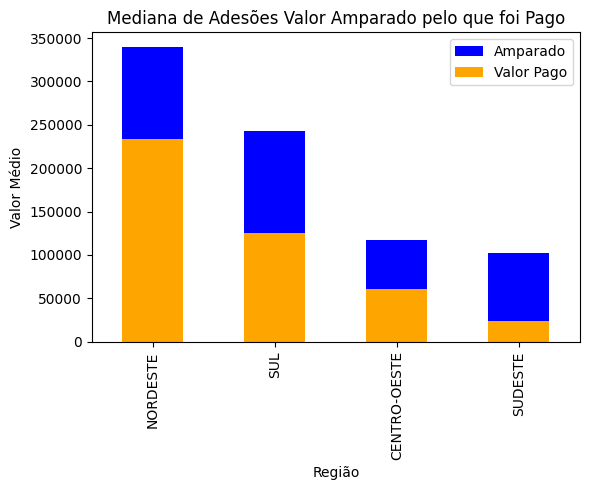

In [ ]:
plt.figure(figsize=(6, 5))
mediana_amparado_regiao.plot(kind='bar', color='blue', label='Amparado')
mediana_pago_regiao.plot(kind='bar', color='orange', label='Valor Pago')
plt.xlabel('Região')
plt.ylabel('Valor Médio')
plt.title('Mediana de Adesões Valor Amparado pelo que foi Pago')
plt.legend()
plt.tight_layout()
plt.show()

####Comparação da média de Adesão e Sinistro

- Calculei as médias a fim de viabilizar a comparação entre os níveis de **adesão** e a **quantidade que foi acionada ao sinistro** por ***Região***

In [ ]:
media_adesoes_regiao = dados_sinistro.groupby('Regiao')['AdesoesArea'].mean().sort_values(ascending = False)
media_sinistros_regiao = dados_sinistro.groupby('Regiao')['SinComunicadoPerdasArea'].mean().sort_values(ascending = False)

In [ ]:
media_adesoes_regiao

Regiao
SUL             388.614750
NORDESTE        203.383026
CENTRO-OESTE     86.337714
SUDESTE          41.159786
NORTE            32.793694
Name: AdesoesArea, dtype: float64

In [ ]:
media_sinistros_regiao

Regiao
SUL             160.337469
NORDESTE         55.779520
CENTRO-OESTE      8.756000
SUDESTE           1.730380
NORTE             0.000000
Name: SinComunicadoPerdasArea, dtype: float64

- Com o gráfico e a proporção da pra ter a noção de que a chance do sinistro ser acionado é muito mais provável na região ***Sul***

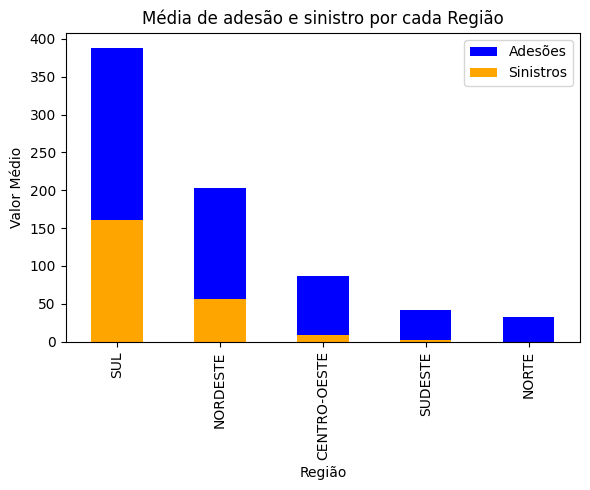

In [ ]:
#Com esse gráfico, é possível obter uma visualização mais nítida das proporções em cada região, revelando ocorrências recorrentes e frequentes.
plt.figure(figsize=(6, 5))
media_adesoes_regiao.plot(kind='bar', color='blue', label='Adesões')
media_sinistros_regiao.plot(kind='bar', color='orange', label='Sinistros')
plt.xlabel('Região')
plt.ylabel('Valor Médio')
plt.title('Média de adesão e sinistro por cada Região')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Aqui da pra ter uma clareza da proporção das ocorrências em cada região (Como o NORTE não tem comunicados de perda ficou INF)
proporção_adesao_sinistro_regiao = media_adesoes_regiao / media_sinistros_regiao
proporção_adesao_sinistro_regiao.sort_values(ascending = True)

Regiao
SUL              2.423730
NORDESTE         3.646195
CENTRO-OESTE     9.860406
SUDESTE         23.786562
NORTE                 inf
dtype: float64

##Análise por ***UF***

####Valores propostos e pagos pelo Sinistro

- Aqui, obtemos uma compreensão da proporção entre os valores propostos pelo seguro e os valores efetivamente pagos.

In [ ]:
mediana_amparado_uf = dados_com_sinistro.groupby('UF')['SinComunicadoPerdasAmparado'].median()
mediana_amparado_uf.sort_values(ascending = False)

UF
BA    954166.785
RS    376625.000
SE    332783.050
AL    320130.965
PR    246146.410
RJ    188352.000
SC    130166.540
ES    129009.180
MS    124432.910
GO    102007.350
MG     95148.460
PE     76908.000
SP     71618.250
PB     62533.620
CE     60011.980
MT     44029.120
Name: SinComunicadoPerdasAmparado, dtype: float64

In [ ]:
mediana_pago_uf = dados_com_sinistro.groupby('UF')['SinCoberturaDeferidoPago'].median()
mediana_pago_uf.sort_values(ascending = False)

UF
BA    598828.390
SE    240206.240
AL    226046.685
RS    226021.360
PR    128924.410
RJ     92916.500
MS     62852.850
SC     62714.195
ES     53792.120
GO     47860.940
MG     21935.395
CE      5317.810
MT         0.000
PB         0.000
PE         0.000
SP         0.000
Name: SinCoberturaDeferidoPago, dtype: float64

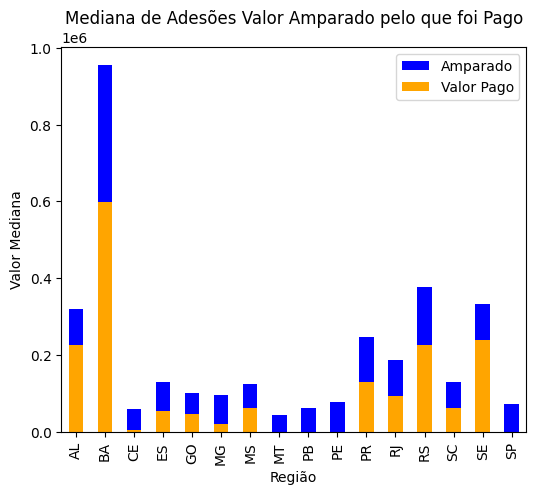

In [ ]:
plt.figure(figsize=(6, 5))
mediana_amparado_uf.plot(kind='bar', color='blue', label='Amparado')
mediana_pago_uf.plot(kind='bar', color='orange', label='Valor Pago')
plt.xlabel('Região')
plt.ylabel('Valor Mediana')
plt.title('Mediana de Adesões Valor Amparado pelo que foi Pago')
plt.legend()
plt.show()

####Comparação da média de Adesão e Sinistro

- Nesta análise, irei comparar os níveis de adesões e sinistros para cada estado ***UF***, a fim de obter uma compreensão mais aprofundada sobre quais estados apresentam maior propensão a solicitar sinistros.

In [ ]:
#Irei deixar um top 10 para não ficar tão extenso no gráfico
media_adesoes_uf = dados_sinistro.groupby('UF')['AdesoesArea'].mean()
media_sinistros_uf = dados_sinistro.groupby('UF')['SinComunicadoPerdasArea'].mean()

In [ ]:
media_adesoes_uf.head(10)

UF
AC     39.316667
AL     84.814286
AM     25.326667
BA    317.238286
CE     36.943396
DF     31.200000
ES    102.744361
GO     42.698734
MA     44.684000
MG     37.353507
Name: AdesoesArea, dtype: float64

In [ ]:
media_sinistros_uf.head(10)

UF
AC     0.000000
AL    17.312857
AM     0.000000
BA    86.043429
CE     0.932075
DF     0.000000
ES     6.452632
GO     2.678481
MA     0.000000
MG     1.127455
Name: SinComunicadoPerdasArea, dtype: float64

- Com o gráfico e a proporção da pra ter a noção de que a chance do sinistro ser acionado é muito mais provável nos estados do **RS**, **PR** e **SE**.

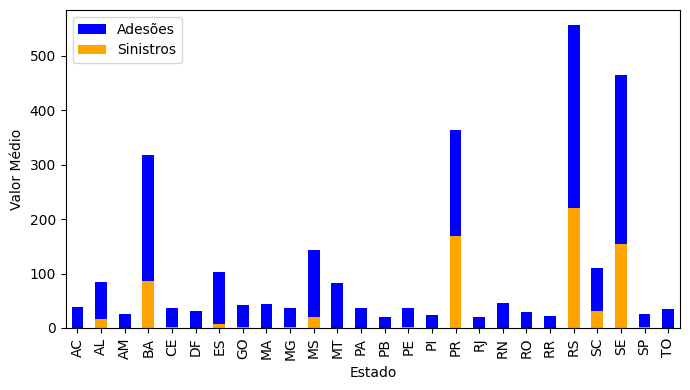

In [ ]:
plt.figure(figsize=(7, 4))
media_adesoes_uf.plot(kind='bar', color='blue', label='Adesões')
media_sinistros_uf.plot(kind='bar', color='orange', label='Sinistros')
plt.xlabel('Estado')
plt.ylabel('Valor Médio')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Aqui da pra ter uma clareza da proporção das ocorrências em cada região
proporção_adesao_sinistro_uf = media_adesoes_uf / media_sinistros_uf
proporção_adesao_sinistro_uf.sort_values(ascending = True).head(10)

UF
PR     2.158961
RS     2.527381
SE     3.004839
SC     3.495653
BA     3.686955
AL     4.898919
MS     6.962178
ES    15.922862
GO    15.941399
PE    20.072231
dtype: float64

#Análise de dados para ***Sudeste*** e ***São Paulo*** por **evento climático**


- Neste contexto, optei por conduzir uma análise mais minuciosa sobre os tipos de eventos climáticos que exercem maior impacto na região em que planejamos atuar. Essa abordagem nos permitirá não apenas compreender as situações mais críticas nessa área, mas também facilitar as análises para outras regiões.

In [ ]:
#Visualização dos tipos de eventos climáticos que acionam o seguro
dados_sinistro['evento'].unique()

array(['SECA', 'CHUVA EXCESSIVA', 'GEADA', 'DOENÇA OU PRAGA', 'GRANIZO',
       'VARIAÇÃO EXCESSIVA DE TEMPERATURA', 'VENTO FORTE',
       'CHUVA NA COLHEITA', 'VENDAVAL', 'VENTO FRIO',
       'OUTROS FENÔMENOS NATURAIS FORTUITOS', 'TROMBA DE ÁGUA',
       'ENCHENTES', 'RAIO', '-'], dtype=object)

##### Delimitar as regiões ***Sudeste*** e ***SP*** com **Sinistro**

In [ ]:
dados_sinistro_sudeste = dados_com_sinistro[dados_com_sinistro['Regiao'] == 'SUDESTE']
dados_sinistro_sudeste

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
729,COM SINISTRO,SECA,SUDESTE,MG,ELÓI MENDES,12.1,3,335256.41,13952.87,12.1,3,335256.41,6.5,1,167193.95,92117.88,0.0,0,0.0
730,COM SINISTRO,SECA,SUDESTE,MG,PARAGUAÇU,14.7,2,382223.64,12641.07,14.7,2,382223.64,14.7,2,382223.64,293538.39,0.0,0,0.0
731,COM SINISTRO,SECA,SUDESTE,MG,CRUZEIRO DA FORTALEZA,12.5,1,288134.32,8795.43,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
732,COM SINISTRO,SECA,SUDESTE,MG,FRUTAL,35.5,1,192835.94,7518.97,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
733,COM SINISTRO,SECA,SUDESTE,MG,CANÁPOLIS,42.0,1,124762.26,6241.10,42.0,1,124762.26,42.0,1,124762.26,51797.17,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,COM SINISTRO,VENTO FRIO,SUDESTE,ES,BARRA DE SÃO FRANCISCO,2.0,1,62680.94,1350.52,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
2853,COM SINISTRO,VENTO FRIO,SUDESTE,ES,PANCAS,1.5,1,60885.00,1218.47,1.5,1,60885.00,1.5,1,60885.00,53792.12,0.0,0,0.0
2854,COM SINISTRO,VENTO FRIO,SUDESTE,ES,NOVA VENÉCIA,0.7,1,28812.96,576.35,0.7,1,28812.96,0.7,1,28812.96,18331.91,0.0,0,0.0
2861,COM SINISTRO,OUTROS FENÔMENOS NATURAIS FORTUITOS,SUDESTE,MG,CAPUTIRA,2.8,1,80338.05,2411.29,2.8,1,80338.05,0.0,0,0.00,0.00,0.0,0,0.0


In [ ]:
dados_sudeste = dados_sinistro[dados_sinistro['Regiao'] == 'SUDESTE']
dados_sudeste

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
729,COM SINISTRO,SECA,SUDESTE,MG,ELÓI MENDES,12.1,3,335256.41,13952.87,12.1,3,335256.41,6.5,1,167193.95,92117.88,0.0,0,0.0
730,COM SINISTRO,SECA,SUDESTE,MG,PARAGUAÇU,14.7,2,382223.64,12641.07,14.7,2,382223.64,14.7,2,382223.64,293538.39,0.0,0,0.0
731,COM SINISTRO,SECA,SUDESTE,MG,CRUZEIRO DA FORTALEZA,12.5,1,288134.32,8795.43,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
732,COM SINISTRO,SECA,SUDESTE,MG,FRUTAL,35.5,1,192835.94,7518.97,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
733,COM SINISTRO,SECA,SUDESTE,MG,CANÁPOLIS,42.0,1,124762.26,6241.10,42.0,1,124762.26,42.0,1,124762.26,51797.17,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,SEM SINISTRO,-,SUDESTE,RJ,VALENÇA,0.1,1,38808.00,876.58,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
4792,SEM SINISTRO,-,SUDESTE,RJ,GUAPIMIRIM,2.5,1,20446.60,613.50,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
4793,SEM SINISTRO,-,SUDESTE,RJ,PARAÍBA DO SUL,0.1,1,29580.00,591.70,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
4794,SEM SINISTRO,-,SUDESTE,RJ,BARRA DO PIRAÍ,1.0,1,21300.00,485.82,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0


In [ ]:
dados_sinistro_sp = dados_com_sinistro[dados_com_sinistro['UF'] == 'SP']
dados_sinistro_sp

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
744,COM SINISTRO,SECA,SUDESTE,SP,ESPÍRITO SANTO DO PINHAL,27.5,2,479871.38,14400.86,27.5,2,479871.38,14.7,1,253884.69,10736.30,0.0,0,0.00
745,COM SINISTRO,SECA,SUDESTE,SP,MARACAÍ,40.0,3,200629.86,10034.48,40.0,3,200629.86,40.0,3,200629.86,132011.11,0.0,0,0.00
746,COM SINISTRO,SECA,SUDESTE,SP,ITAPETININGA,31.1,1,86506.52,6406.49,31.1,1,86506.52,0.0,0,0.00,0.00,0.0,0,0.00
747,COM SINISTRO,SECA,SUDESTE,SP,ARAÇATUBA,17.8,1,85933.32,5242.76,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
748,COM SINISTRO,SECA,SUDESTE,SP,PLATINA,19.4,1,71618.25,3833.97,19.4,1,71618.25,0.0,0,0.00,0.00,0.0,0,0.00
749,COM SINISTRO,SECA,SUDESTE,SP,MANDURI,9.6,1,103755.04,3264.21,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.00
750,COM SINISTRO,SECA,SUDESTE,SP,ASSIS,12.1,1,64767.45,3238.89,12.1,1,64767.45,0.0,0,0.00,0.00,0.0,0,0.00
751,COM SINISTRO,SECA,SUDESTE,SP,PEDREGULHO,2.7,1,99839.96,3146.70,2.7,1,99839.96,0.0,0,0.00,0.00,0.0,0,0.00
752,COM SINISTRO,SECA,SUDESTE,SP,PARAGUAÇU PAULISTA,11.5,1,40646.75,2033.31,11.5,1,40646.75,0.0,0,0.00,0.00,0.0,0,0.00
753,COM SINISTRO,SECA,SUDESTE,SP,MOTUCA,14.0,1,40334.00,2017.02,14.0,1,40334.00,0.0,0,0.00,0.00,0.0,0,0.00


##Análise no ***Sudeste***

###Valores propostos e pagos pelo Sinistro pela Mediana

In [ ]:
mediana_amparado_sudeste = dados_sinistro_sudeste.groupby('evento')['SinComunicadoPerdasAmparado'].median()
#Aqui vemos que as perdas mais recorrentes é a variação excessiva de temperatura
mediana_amparado_sudeste.sort_values(ascending = False)

evento
VARIAÇÃO EXCESSIVA DE TEMPERATURA      154266.96
VENDAVAL                               129533.84
VENTO FORTE                            129009.18
DOENÇA OU PRAGA                        109356.00
CHUVA EXCESSIVA                        108522.54
GRANIZO                                102286.07
TROMBA DE ÁGUA                          93102.40
SECA                                    80724.60
OUTROS FENÔMENOS NATURAIS FORTUITOS     80338.05
VENTO FRIO                              60885.00
GEADA                                   51686.88
Name: SinComunicadoPerdasAmparado, dtype: float64

In [ ]:
mediana_pago_sudeste = dados_sinistro_sudeste.groupby('evento')['SinCoberturaDeferidoPago'].median()
#aqui da pra ver que a Tromba de Água é o evento que mais é coberto diferente do quanto que foi comunicado
mediana_pago_sudeste.sort_values(ascending = False)

evento
TROMBA DE ÁGUA                         67370.670
VENTO FRIO                             53792.120
VENDAVAL                               49254.510
VENTO FORTE                            40376.430
VARIAÇÃO EXCESSIVA DE TEMPERATURA      37141.355
GRANIZO                                28166.520
CHUVA EXCESSIVA                        27111.725
DOENÇA OU PRAGA                        16040.150
GEADA                                   6566.345
OUTROS FENÔMENOS NATURAIS FORTUITOS        0.000
SECA                                       0.000
Name: SinCoberturaDeferidoPago, dtype: float64

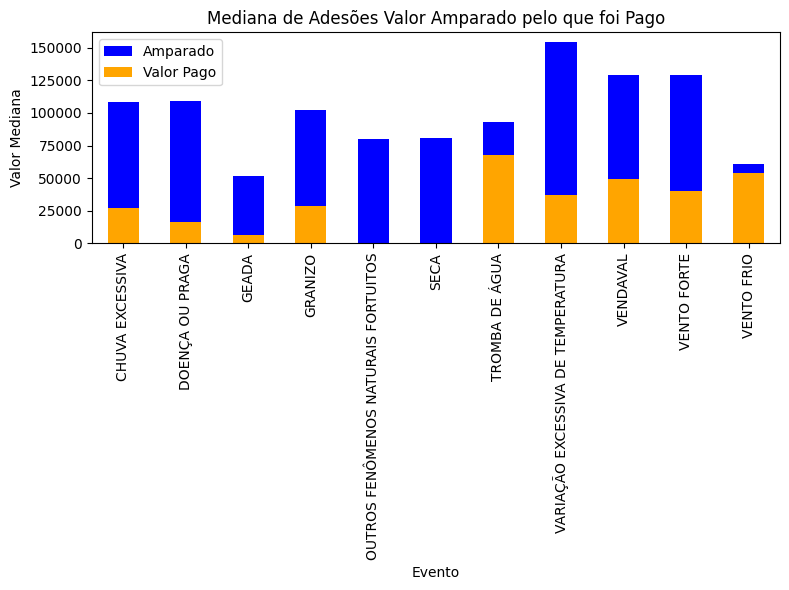

In [ ]:
plt.figure(figsize=(8, 6))
mediana_amparado_sudeste.plot(kind='bar', color='blue', label='Amparado')
mediana_pago_sudeste.plot(kind='bar', color='orange', label='Valor Pago')
plt.xlabel('Evento')
plt.ylabel('Valor Mediana')
plt.title('Mediana de Adesões Valor Amparado pelo que foi Pago')
plt.legend()
plt.tight_layout()
plt.show()

### Comparação da média de **Adesão** e **Sinistro** por evento climático

In [ ]:
media_adesoes_sudeste = dados_sinistro_sudeste.groupby('evento')['AdesoesArea'].mean()
media_sinistros_sudeste = dados_sinistro_sudeste.groupby('evento')['SinComunicadoPerdasArea'].mean()

In [ ]:
#aqui vemos que é mais decorrente ter adesões nos locares com Vento Forte
media_adesoes_sudeste.sort_values(ascending = False)

evento
VENTO FORTE                            45.366667
VENDAVAL                               14.327273
SECA                                   12.900000
CHUVA EXCESSIVA                        11.500000
GRANIZO                                 7.809722
VARIAÇÃO EXCESSIVA DE TEMPERATURA       6.675000
VENTO FRIO                              5.433333
DOENÇA OU PRAGA                         5.188235
TROMBA DE ÁGUA                          4.000000
OUTROS FENÔMENOS NATURAIS FORTUITOS     2.800000
GEADA                                   2.600000
Name: AdesoesArea, dtype: float64

In [ ]:
#assim como sinistros atendem por mais chamados de sinistro em Vento Forte
media_sinistros_sudeste.sort_values(ascending = False)

evento
VENTO FORTE                            36.793333
VENDAVAL                               13.654545
SECA                                    9.365517
CHUVA EXCESSIVA                         7.853846
VARIAÇÃO EXCESSIVA DE TEMPERATURA       6.675000
GRANIZO                                 5.804167
DOENÇA OU PRAGA                         4.752941
TROMBA DE ÁGUA                          4.000000
VENTO FRIO                              3.322222
OUTROS FENÔMENOS NATURAIS FORTUITOS     2.800000
GEADA                                   2.600000
Name: SinComunicadoPerdasArea, dtype: float64

- Esse gráfico oferece uma visão clara das principais causas de sinistros no ***Sudeste***, destacando que **Vento Forte** e **Vendaval** são responsáveis pelas ocorrências mais significativas.

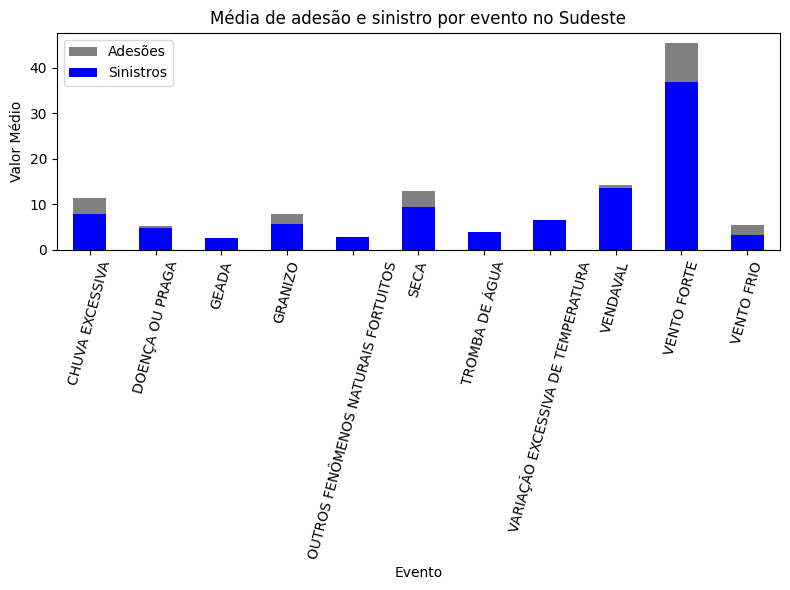

In [ ]:
plt.figure(figsize=(8, 6))
media_adesoes_sudeste.plot(kind='bar', color='grey', label='Adesões')
media_sinistros_sudeste.plot(kind='bar', color='blue', label='Sinistros')
plt.xlabel('Evento')
plt.ylabel('Valor Médio')
plt.xticks(rotation=75)
plt.title('Média de adesão e sinistro por evento no Sudeste')
plt.legend()
plt.tight_layout()
plt.show()

###Média da quantidade de **Contratos** solicitados por evento climático

- Média de **Contratos** por cada evento climático no **Sudeste**. Neste caso, vale ressaltar que a área não influencia na quantidade de contratos, tornando crucial compreender a média de ocorrências para cada tipo de evento climático.



In [ ]:
média_contrato_sudeste = dados_sinistro_sudeste.groupby('evento')['SinComunicadoPerdasContrato'].mean()
média_contrato_sudeste

evento
CHUVA EXCESSIVA                        1.615385
DOENÇA OU PRAGA                        1.764706
GEADA                                  1.000000
GRANIZO                                1.666667
OUTROS FENÔMENOS NATURAIS FORTUITOS    1.000000
SECA                                   1.034483
TROMBA DE ÁGUA                         1.000000
VARIAÇÃO EXCESSIVA DE TEMPERATURA      1.500000
VENDAVAL                               1.454545
VENTO FORTE                            6.800000
VENTO FRIO                             0.777778
Name: SinComunicadoPerdasContrato, dtype: float64

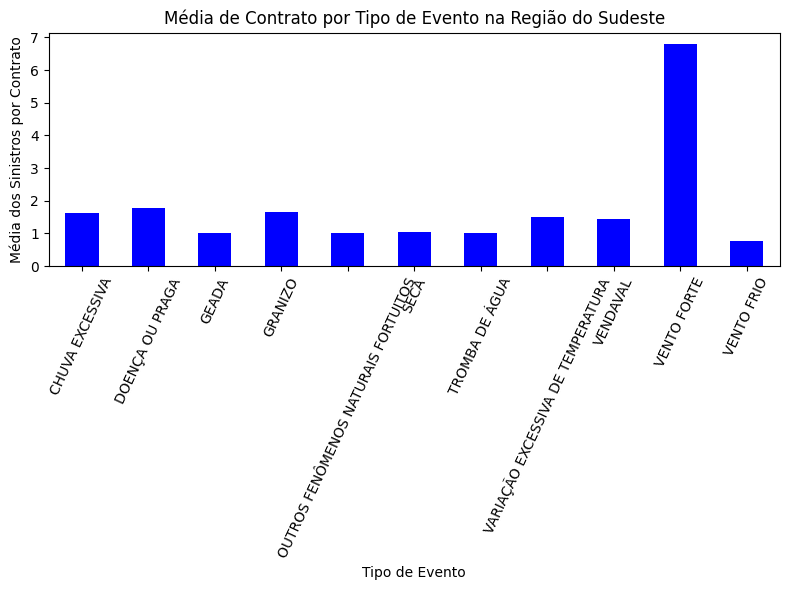

In [ ]:
plt.figure(figsize=(8, 6))
média_contrato_sudeste.plot(kind='bar', color='blue')
plt.xlabel('Tipo de Evento')
plt.ylabel('Média dos Sinistros por Contrato')
plt.title('Média de Contrato por Tipo de Evento na Região do Sudeste')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

##Análise em ***SP***

###Comparação da média de **Adesão** e **Sinistro** por evento climático

- Nessa análise categorizei os níveis de adesão e as de sinistros por tipo de evento apenas no ***SP***

In [ ]:
media_adesoes_sp = dados_sinistro_sp.groupby('evento')['AdesoesArea'].mean()
media_sinistros_sp = dados_sinistro_sp.groupby('evento')['SinComunicadoPerdasArea'].mean()

In [ ]:
media_adesoes_sp.sort_values(ascending = False)

evento
SECA                                 17.245455
CHUVA EXCESSIVA                      13.854545
DOENÇA OU PRAGA                       8.466667
GRANIZO                               7.766667
VARIAÇÃO EXCESSIVA DE TEMPERATURA     7.000000
VENTO FORTE                           6.950000
GEADA                                 3.100000
Name: AdesoesArea, dtype: float64

In [ ]:
media_sinistros_sp.sort_values(ascending = False)

evento
SECA                                 14.754545
CHUVA EXCESSIVA                       7.872727
VARIAÇÃO EXCESSIVA DE TEMPERATURA     7.000000
VENTO FORTE                           6.950000
GRANIZO                               6.500000
DOENÇA OU PRAGA                       6.000000
GEADA                                 3.100000
Name: SinComunicadoPerdasArea, dtype: float64

- Esse gráfico oferece uma visão clara das principais causas de sinistros em ***SP***, destacando que **Seca** e **Chuva Excessiva** são responsáveis pelas ocorrências mais significativas.

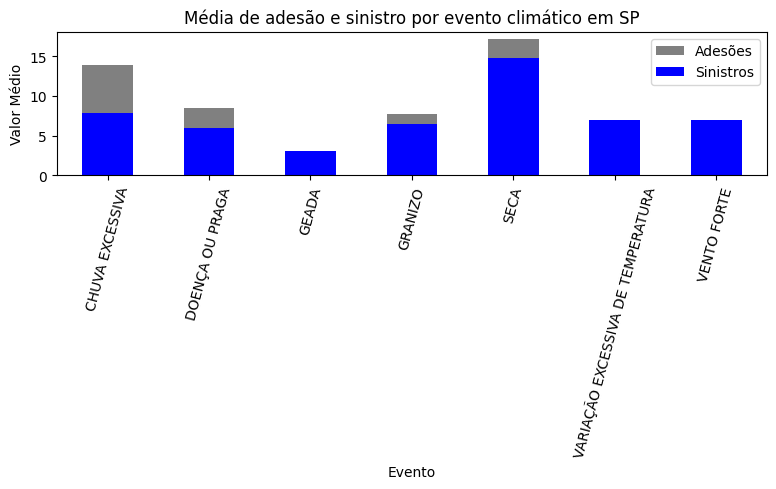

In [ ]:
plt.figure(figsize=(8, 5))
media_adesoes_sp.plot(kind='bar', color='grey', label='Adesões')
media_sinistros_sp.plot(kind='bar', color='blue', label='Sinistros')
plt.xlabel('Evento')
plt.ylabel('Valor Médio')
plt.xticks(rotation=75)
plt.title('Média de adesão e sinistro por evento climático em SP')
plt.legend()
plt.tight_layout()
plt.show()

###Média da quantidade de **Contratos** solicitados por evento climático

- Média de contratos por cada evento climático em **SP**. Neste caso, vale ressaltar que a área não influencia na quantidade de contratos, tornando crucial compreender a média de ocorrências para cada tipo de evento climático.

In [ ]:
média_contrato_sp = dados_sinistro_sp.groupby('evento')['SinComunicadoPerdasContrato'].mean()
média_contrato_sp

evento
CHUVA EXCESSIVA                      0.818182
DOENÇA OU PRAGA                      0.666667
GEADA                                1.000000
GRANIZO                              1.666667
SECA                                 1.090909
VARIAÇÃO EXCESSIVA DE TEMPERATURA    1.000000
VENTO FORTE                          1.000000
Name: SinComunicadoPerdasContrato, dtype: float64

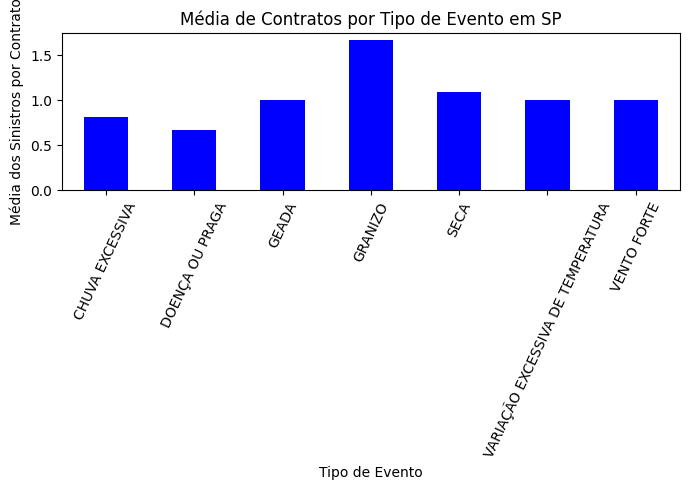

In [ ]:
plt.figure(figsize=(7, 5))
média_contrato_sp.plot(kind='bar', color='blue')
plt.xlabel('Tipo de Evento')
plt.ylabel('Média dos Sinistros por Contrato')
plt.title('Média de Contratos por Tipo de Evento em SP')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

#Challenge

In [ ]:
dados_sinistro_sudeste

,Situacao,evento,Regiao,UF,Municipio,AdesoesArea,AdesoesContrato,AdesoesAmparado,AdesoesAdicional,SinComunicadoPerdasArea,SinComunicadoPerdasContrato,SinComunicadoPerdasAmparado,SinCoberturaDeferidoArea,SinCoberturaDeferidoContrato,SinCoberturaDeferidoAmparado,SinCoberturaDeferidoPago,SinCoberturaAnaliseArea,SinCoberturaAnaliseContrato,SinCoberturaAnaliseAmparado
729,COM SINISTRO,SECA,SUDESTE,MG,ELÓI MENDES,12.1,3,335256.41,13952.87,12.1,3,335256.41,6.5,1,167193.95,92117.88,0.0,0,0.0
730,COM SINISTRO,SECA,SUDESTE,MG,PARAGUAÇU,14.7,2,382223.64,12641.07,14.7,2,382223.64,14.7,2,382223.64,293538.39,0.0,0,0.0
731,COM SINISTRO,SECA,SUDESTE,MG,CRUZEIRO DA FORTALEZA,12.5,1,288134.32,8795.43,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
732,COM SINISTRO,SECA,SUDESTE,MG,FRUTAL,35.5,1,192835.94,7518.97,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
733,COM SINISTRO,SECA,SUDESTE,MG,CANÁPOLIS,42.0,1,124762.26,6241.10,42.0,1,124762.26,42.0,1,124762.26,51797.17,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,COM SINISTRO,VENTO FRIO,SUDESTE,ES,BARRA DE SÃO FRANCISCO,2.0,1,62680.94,1350.52,0.0,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0
2853,COM SINISTRO,VENTO FRIO,SUDESTE,ES,PANCAS,1.5,1,60885.00,1218.47,1.5,1,60885.00,1.5,1,60885.00,53792.12,0.0,0,0.0
2854,COM SINISTRO,VENTO FRIO,SUDESTE,ES,NOVA VENÉCIA,0.7,1,28812.96,576.35,0.7,1,28812.96,0.7,1,28812.96,18331.91,0.0,0,0.0
2861,COM SINISTRO,OUTROS FENÔMENOS NATURAIS FORTUITOS,SUDESTE,MG,CAPUTIRA,2.8,1,80338.05,2411.29,2.8,1,80338.05,0.0,0,0.00,0.00,0.0,0,0.0


In [ ]:
dados_sinistro.to_csv('Relatorio 25-08-2023.csv', index=False)

from google.colab import files
files.download('Relatorio 25-08-2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>